In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

https://www.kaggle.com/datasets/yuliiabulana/canada-housing

In [23]:
df = pd.read_csv("cleaned_canada.csv")
df.head()

,City,Province,Latitude,Longitude,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,...,Exterior,Fireplace,Heating,Flooring,Roof,Waterfront,Sewer,Pool,Garden,Balcony
0,Revelstoke,BC,50.976585,-118.173149,839000.0,3.0,2.0,0.00,Condo,891.0,...,NaN,No,heat pump,carpet,NaN,No,municipal,No,No,No
1,Boswell,BC,49.471870,-116.770195,1150000.0,3.0,2.0,0.32,Single Family,1881.0,...,NaN,No,heat pump,NaN,NaN,No,septic,No,No,No
2,West Kelowna,BC,49.825230,-119.603253,149000.0,2.0,1.0,0.00,Single Family,912.0,...,Metal,No,NaN,laminate,tar,No,municipal,No,No,No
3,Kelowna,BC,49.821860,-119.480143,1298000.0,5.0,4.0,0.69,Single Family,4374.0,...,NaN,Yes,forced air,NaN,NaN,No,municipal,No,No,No
4,Maple Ridge,BC,49.221673,-122.596637,759900.0,3.0,2.0,0.00,Condo,1254.0,...,NaN,No,radiant,NaN,NaN,No,none,No,No,No


In [24]:
df.shape

(44896, 23)

In [25]:
df.isna().sum()

City                  0
Province              0
Latitude              0
Longitude             0
Price                 0
Bedrooms              0
Bathrooms             0
Acreage               0
Property Type         0
Square Footage        0
Garage                0
Parking               0
Basement          29934
Exterior          27457
Fireplace             0
Heating            6654
Flooring          29680
Roof              34844
Waterfront            0
Sewer                 0
Pool                  0
Garden                0
Balcony               0
dtype: int64

In [26]:
df1 = df.drop(["Basement", "Exterior", "Flooring", "Roof", "Latitude", "Longitude"], axis = 1).dropna()
df1.isna().sum()

City              0
Province          0
Price             0
Bedrooms          0
Bathrooms         0
Acreage           0
Property Type     0
Square Footage    0
Garage            0
Parking           0
Fireplace         0
Heating           0
Waterfront        0
Sewer             0
Pool              0
Garden            0
Balcony           0
dtype: int64

In [27]:
df1.head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony
0,Revelstoke,BC,839000.0,3.0,2.0,0.00,Condo,891.0,Yes,Yes,No,heat pump,No,municipal,No,No,No
1,Boswell,BC,1150000.0,3.0,2.0,0.32,Single Family,1881.0,Yes,Yes,No,heat pump,No,septic,No,No,No
3,Kelowna,BC,1298000.0,5.0,4.0,0.69,Single Family,4374.0,Yes,No,Yes,forced air,No,municipal,No,No,No
4,Maple Ridge,BC,759900.0,3.0,2.0,0.00,Condo,1254.0,Yes,Yes,No,radiant,No,none,No,No,No
5,Calgary,AB,749800.0,4.0,3.0,0.07,Single Family,2047.0,Yes,No,Yes,forced air,No,none,No,Yes,Yes


In [28]:
df2 = df1.copy()
df2['price_per_sqft'] = df2["Price"] / df["Square Footage"]
df2.head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
0,Revelstoke,BC,839000.0,3.0,2.0,0.00,Condo,891.0,Yes,Yes,No,heat pump,No,municipal,No,No,No,941.638608
1,Boswell,BC,1150000.0,3.0,2.0,0.32,Single Family,1881.0,Yes,Yes,No,heat pump,No,septic,No,No,No,611.376927
3,Kelowna,BC,1298000.0,5.0,4.0,0.69,Single Family,4374.0,Yes,No,Yes,forced air,No,municipal,No,No,No,296.753544
4,Maple Ridge,BC,759900.0,3.0,2.0,0.00,Condo,1254.0,Yes,Yes,No,radiant,No,none,No,No,No,605.980861
5,Calgary,AB,749800.0,4.0,3.0,0.07,Single Family,2047.0,Yes,No,Yes,forced air,No,none,No,Yes,Yes,366.292135


In [29]:
location_stats = df2["City"].value_counts(ascending=False)
print(location_stats)

City
Vancouver     3375
Surrey        2940
Calgary       1949
Richmond      1241
Kelowna       1177
              ... 
Irricana         1
Riondel          1
Wynndel          1
Colinton         1
Sandy Lake       1
Name: count, Length: 2300, dtype: int64


In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [31]:
df2.City = df2.City.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df2.head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
0,other,BC,839000.0,3.0,2.0,0.00,Condo,891.0,Yes,Yes,No,heat pump,No,municipal,No,No,No,941.638608
1,other,BC,1150000.0,3.0,2.0,0.32,Single Family,1881.0,Yes,Yes,No,heat pump,No,septic,No,No,No,611.376927
3,Kelowna,BC,1298000.0,5.0,4.0,0.69,Single Family,4374.0,Yes,No,Yes,forced air,No,municipal,No,No,No,296.753544
4,Maple Ridge,BC,759900.0,3.0,2.0,0.00,Condo,1254.0,Yes,Yes,No,radiant,No,none,No,No,No,605.980861
5,Calgary,AB,749800.0,4.0,3.0,0.07,Single Family,2047.0,Yes,No,Yes,forced air,No,none,No,Yes,Yes,366.292135


In [32]:
df3 = df2.copy()
# cols = ["Garage", "Parking", "Fireplace", "Waterfront", "Pool", "Garden", "Balcony"]
# df3[cols] = df3[cols].replace({"Yes": 1, "No": 0})
df3.head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
0,other,BC,839000.0,3.0,2.0,0.00,Condo,891.0,Yes,Yes,No,heat pump,No,municipal,No,No,No,941.638608
1,other,BC,1150000.0,3.0,2.0,0.32,Single Family,1881.0,Yes,Yes,No,heat pump,No,septic,No,No,No,611.376927
3,Kelowna,BC,1298000.0,5.0,4.0,0.69,Single Family,4374.0,Yes,No,Yes,forced air,No,municipal,No,No,No,296.753544
4,Maple Ridge,BC,759900.0,3.0,2.0,0.00,Condo,1254.0,Yes,Yes,No,radiant,No,none,No,No,No,605.980861
5,Calgary,AB,749800.0,4.0,3.0,0.07,Single Family,2047.0,Yes,No,Yes,forced air,No,none,No,Yes,Yes,366.292135


In [33]:
df3[(df3["Square Footage"] / df3["Bedrooms"]) < 300].head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
0,other,BC,839000.0,3.0,2.0,0.00,Condo,891.0,Yes,Yes,No,heat pump,No,municipal,No,No,No,941.638608
6,Camrose,AB,385000.0,5.0,3.0,0.13,Single Family,1330.0,Yes,No,No,forced air,No,none,No,No,No,289.473684
10,Saskatoon,SK,499000.0,4.0,3.0,0.16,Single Family,1167.0,Yes,No,No,forced air,No,none,No,No,No,427.592117
12,other,AB,230000.0,4.0,2.0,0.21,Single Family,1056.0,No,No,No,forced air,No,municipal,No,No,No,217.803030
19,Medicine Hat,AB,535000.0,5.0,3.0,0.15,Single Family,1430.0,Yes,No,Yes,forced air,No,none,No,Yes,No,374.125874


In [34]:
df4 = df3[~(df3["Square Footage"] / df3["Bedrooms"] < 300)]
df4.shape

(35669, 18)

In [35]:
df4.price_per_sqft.describe()

count    35669.000000
mean       620.884697
std        538.344817
min          4.753496
25%        326.233184
50%        509.924190
75%        821.285714
max      50000.000000
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('City'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(30416, 18)

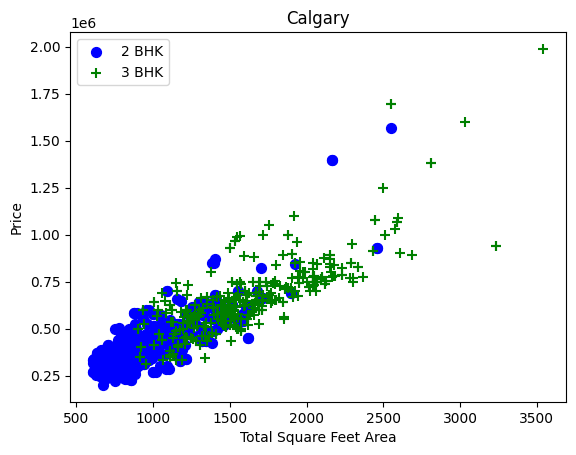

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.City==location) & (df.Bedrooms==2)]
    bhk3 = df[(df.City==location) & (df.Bedrooms==3)]
    plt.scatter(bhk2["Square Footage"],bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3["Square Footage"],bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Calgary")

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('City'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df5.shape

(14915, 18)

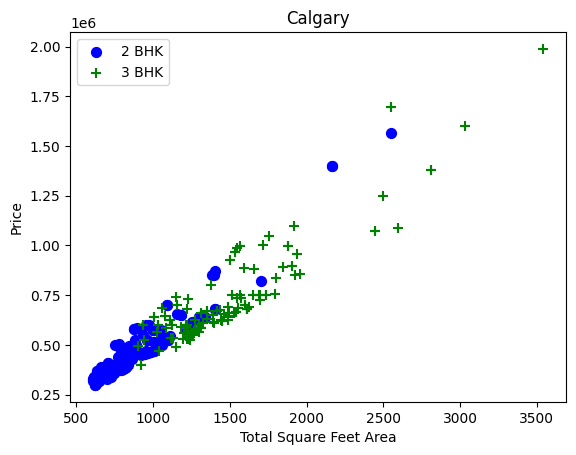

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.City==location) & (df.Bedrooms==2)]
    bhk3 = df[(df.City==location) & (df.Bedrooms==3)]
    plt.scatter(bhk2["Square Footage"],bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3["Square Footage"],bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Calgary")

In [41]:
df5[df5.Bathrooms>df5.Bedrooms+2].head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
981,Anmore,BC,6800000.0,6.0,11.0,1.10,Single Family,10849.0,Yes,Yes,Yes,boiler,No,none,No,No,No,626.785879
1370,Burlington,ON,6850000.0,5.0,8.0,0.00,Single Family,7712.0,Yes,No,Yes,forced air,No,municipal,No,No,No,888.226141
1382,Burlington,ON,5999888.0,4.0,7.0,0.00,Single Family,7564.0,Yes,No,Yes,forced air,No,septic,No,No,No,793.216288
3276,Calgary,AB,739000.0,1.0,5.0,0.07,Duplex,2255.0,Yes,No,Yes,forced air,No,none,No,No,Yes,327.716186
3330,Calgary,AB,3800000.0,5.0,9.0,1.00,Single Family,6793.0,Yes,No,Yes,forced air,No,none,No,Yes,No,559.399382


In [42]:
df6 = df5[df5.Bathrooms<df5.Bedrooms+2]
df6.shape

(14721, 18)

In [43]:
df7 = df6.drop("price_per_sqft", axis=1)
df7.head(3)

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony
2,Abbotsford,BC,769900.0,3.0,3.0,0.0,Townhome,1422.0,Yes,No,No,forced air,No,none,No,No,No
3,Abbotsford,BC,814900.0,3.0,3.0,0.0,Townhome,1457.0,Yes,No,No,forced air,No,none,No,No,No
9,Abbotsford,BC,1148000.0,3.0,1.0,0.2,Single Family,2258.0,Yes,Yes,Yes,boiler,No,none,No,No,No


In [44]:
for i in df7.columns:
    print(len(df7[i].unique()))


273
8
3076
18
14
716
8
3426
2
2
2
9
2
5
2
2
2


In [45]:
target = "Price"
X = df7.drop(columns=[target])
y = df7[target].values

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['Bedrooms', 'Bathrooms', 'Acreage', 'Square Footage']
Categorical: ['City', 'Province', 'Property Type', 'Garage', 'Parking', 'Fireplace', 'Heating', 'Waterfront', 'Sewer', 'Pool', 'Garden', 'Balcony']


In [58]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [47]:
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

preprocess = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("cats", cat_pipeline, cat_cols),
        ("nums", num_pipeline, num_cols)
    ]))
])

processed_data = preprocess.fit_transform(X)
processed_data.shape

(14721, 321)

In [ ]:
lr_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)

0.8136420704102402

In [55]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(
    lr_pipe,
    X,
    y,
    cv=cv
)


array([0.7899762 , 0.81845346, 0.80707197, 0.80155681, 0.81670576])

In [59]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "model__fit_intercept": [True, False]
            }
        },
        "lasso": {
            "model": Lasso(max_iter=5000),
            "params": {
                "model__alpha": [0.1, 1, 10]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(random_state=42),
            "params": {
                "model__max_depth": [None, 5, 10, 20],
                "model__min_samples_leaf": [1, 5, 20]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        pipe = Pipeline([
            ("preprocess", preprocess),
            ("model", config["model"])
        ])

        gs = GridSearchCV(
            pipe,
            config["params"],
            cv=cv,
            scoring="r2",
            n_jobs=-1
        )

        gs.fit(X, y)

        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })

    return pd.DataFrame(scores)


In [62]:
result = find_best_model_using_gridsearchcv(X, y)

In [72]:
result

,model,best_score,best_params
0,linear_regression,0.806753,{'model__fit_intercept': True}
1,lasso,0.806929,{'model__alpha': 10}
2,decision_tree,0.890388,"{'model__max_depth': 20, 'model__min_samples_l..."


In [69]:
result.loc[2][2]

C:\Users\tomin\AppData\Local\Temp\ipykernel_6936\4264601455.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.loc[2][2]


{'model__max_depth': 20, 'model__min_samples_leaf': 1}

In [70]:
final_model = Pipeline([
    ("preprocess", preprocess),
    ("model", DecisionTreeRegressor(
        random_state=42,
        max_depth=20,
        min_samples_leaf=1
    ))
])

final_model.fit(X, y)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('preprocessor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cats', ...), ('nums', ...)]"
,remainder,'drop'
,sparse_threshold,0.3


In [74]:
import joblib
joblib.dump(final_model, "canada_home_prices_model.joblib", compress=3)

['canada_home_prices_model.joblib']

In [75]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [76]:
import json

categorical_cols = [
    "City",
    "Province",
    "Property Type",
    "Heating",
    "Sewer",
    "Garage",
    "Parking",
    "Fireplace",
    "Waterfront",
    "Pool",
    "Garden",
    "Balcony"
]

categories = {}

for col in categorical_cols:
    categories[col.lower()] = sorted(df[col].dropna().unique().tolist())

with open("categories.json", "w") as f:
    json.dump(categories, f, indent=4)